## temp

In [1]:
import polars as pl
pl.Config.set_tbl_rows(50)

polars.config.Config

In [13]:
import pyarrow as pa
# 文字列の先頭に r をつける
pa.ipc.open_file("./test_2/result/test_ba100_agent.arrow").schema

num_iter: uint32 not null
t: uint32 not null
agent_idx: uint32 not null
selfish: bool not null
-- schema metadata --
agent_config: './v2/test_2/agent/agent-type2.toml'
app: 'v2'
delay_selfish: '0'
enable_inhibition: 'false'
iteration_count: '100'
network_config: './v2/test_2/network/network-ba100.toml'
runtime: './v2/test_2/runtime.toml'
strategy_config: './v2/test_2/strategy/strategy-config.toml'
version: '0.2.1'

In [14]:
pl.read_ipc("./test_2/result/test_ba100_agent.arrow", memory_map=False)

shape: (356, 4)
┌──────────┬─────┬───────────┬─────────┐
│ num_iter ┆ t   ┆ agent_idx ┆ selfish │
│ ---      ┆ --- ┆ ---       ┆ ---     │
│ u32      ┆ u32 ┆ u32       ┆ bool    │
╞══════════╪═════╪═══════════╪═════════╡
│ 7        ┆ 5   ┆ 30        ┆ true    │
│ 7        ┆ 7   ┆ 55        ┆ true    │
│ 9        ┆ 4   ┆ 58        ┆ true    │
│ 0        ┆ 3   ┆ 97        ┆ true    │
│ 0        ┆ 4   ┆ 26        ┆ true    │
│ 0        ┆ 5   ┆ 95        ┆ true    │
│ 0        ┆ 6   ┆ 84        ┆ true    │
│ 0        ┆ 6   ┆ 46        ┆ true    │
│ 16       ┆ 3   ┆ 24        ┆ true    │
│ 20       ┆ 2   ┆ 1         ┆ true    │
│ 20       ┆ 4   ┆ 12        ┆ true    │
│ 20       ┆ 5   ┆ 24        ┆ true    │
│ 20       ┆ 5   ┆ 5         ┆ true    │
│ 24       ┆ 1   ┆ 95        ┆ true    │
│ 24       ┆ 3   ┆ 92        ┆ true    │
│ 26       ┆ 3   ┆ 41        ┆ true    │
│ 23       ┆ 2   ┆ 22        ┆ true    │
│ 23       ┆ 2   ┆ 18        ┆ true    │
│ 4        ┆ 2   ┆ 0         ┆ true    │
│ 4        ┆ 3   ┆ 35        ┆ true    │
│ 4        ┆ 3   ┆ 6         ┆ true    │
│ 4        ┆ 4   ┆ 20        ┆ true    │
│ 4        ┆ 4   ┆ 2         ┆ true    │
│ 4        ┆ 4   ┆ 94        ┆ true    │
│ 4        ┆ 6   ┆ 39        ┆ true    │
│ …        ┆ …   ┆ …         ┆ …       │
│ 98       ┆ 4   ┆ 12        ┆ true    │
│ 98       ┆ 6   ┆ 31        ┆ true    │
│ 98       ┆ 7   ┆ 37        ┆ true    │
│ 98       ┆ 9   ┆ 4         ┆ true    │
│ 98       ┆ 9   ┆ 57        ┆ true    │
│ 98       ┆ 9   ┆ 8         ┆ true    │
│ 98       ┆ 9   ┆ 23        ┆ true    │
│ 98       ┆ 10  ┆ 90        ┆ true    │
│ 83       ┆ 3   ┆ 11        ┆ true    │
│ 83       ┆ 4   ┆ 95        ┆ true    │
│ 83       ┆ 5   ┆ 84        ┆ true    │
│ 83       ┆ 5   ┆ 0         ┆ true    │
│ 83       ┆ 5   ┆ 88        ┆ true    │
│ 83       ┆ 5   ┆ 31        ┆ true    │
│ 83       ┆ 6   ┆ 4         ┆ true    │
│ 83       ┆ 6   ┆ 40        ┆ true    │
│ 83       ┆ 6   ┆ 36        ┆ true    │
│ 83       ┆ 6   ┆ 10        ┆ true    │
│ 83       ┆ 8   ┆ 57        ┆ true    │
│ 83       ┆ 8   ┆ 2         ┆ true    │
│ 83       ┆ 9   ┆ 15        ┆ true    │
│ 83       ┆ 10  ┆ 17        ┆ true    │
│ 83       ┆ 10  ┆ 83        ┆ true    │
│ 83       ┆ 10  ┆ 97        ┆ true    │
│ 83       ┆ 10  ┆ 25        ┆ true    │
└──────────┴─────┴───────────┴─────────┘

In [15]:
(pl.read_ipc("./test_2/result/test_ba100_info.arrow", memory_map=False)
     .lazy()
     .group_by([pl.col("t"), pl.col("info_label")])
     .agg([
         pl.col("num_posted").mean(),
         pl.col("num_received").mean(),
         pl.col("num_shared").mean(),
         pl.col("num_viewed").mean(),
         pl.col("num_fst_viewed").mean(),
     ])
).collect()

shape: (27, 7)
┌─────┬────────────┬────────────┬──────────────┬────────────┬────────────┬────────────────┐
│ t   ┆ info_label ┆ num_posted ┆ num_received ┆ num_shared ┆ num_viewed ┆ num_fst_viewed │
│ --- ┆ ---        ┆ ---        ┆ ---          ┆ ---        ┆ ---        ┆ ---            │
│ u32 ┆ u8         ┆ f64        ┆ f64          ┆ f64        ┆ f64        ┆ f64            │
╞═════╪════════════╪════════════╪══════════════╪════════════╪════════════╪════════════════╡
│ 0   ┆ 0          ┆ 1.0        ┆ 0.0          ┆ 0.0        ┆ 0.0        ┆ 0.0            │
│ 1   ┆ 0          ┆ 0.0        ┆ 5.14         ┆ 0.37       ┆ 2.65       ┆ 2.65           │
│ 13  ┆ 1          ┆ 0.0        ┆ 9.0          ┆ 0.0        ┆ 4.0        ┆ 1.0            │
│ 8   ┆ 0          ┆ 0.0        ┆ 0.441176     ┆ 0.029412   ┆ 0.176471   ┆ 0.058824       │
│ 9   ┆ 1          ┆ 0.0        ┆ 15.45        ┆ 1.05       ┆ 8.25       ┆ 4.05           │
│ 1   ┆ 1          ┆ 1.0        ┆ 0.0          ┆ 0.0        ┆ 0.0        ┆ 0.0            │
│ 2   ┆ 1          ┆ 1.0        ┆ 4.61         ┆ 0.73       ┆ 2.45       ┆ 2.45           │
│ 5   ┆ 0          ┆ 0.0        ┆ 5.445946     ┆ 0.405405   ┆ 2.662162   ┆ 1.378378       │
│ 3   ┆ 1          ┆ 1.0        ┆ 11.05        ┆ 1.41       ┆ 5.36       ┆ 5.1            │
│ 12  ┆ 0          ┆ 0.0        ┆ 0.0          ┆ 0.0        ┆ 0.0        ┆ 0.0            │
│ 11  ┆ 1          ┆ 0.0        ┆ 20.0         ┆ 2.0        ┆ 10.0       ┆ 5.2            │
│ 7   ┆ 0          ┆ 0.0        ┆ 1.382979     ┆ 0.06383    ┆ 0.659574   ┆ 0.191489       │
│ 6   ┆ 0          ┆ 0.0        ┆ 3.189655     ┆ 0.206897   ┆ 1.689655   ┆ 0.758621       │
│ 2   ┆ 0          ┆ 0.0        ┆ 3.48         ┆ 0.47       ┆ 1.82       ┆ 1.72           │
│ 8   ┆ 1          ┆ 0.0        ┆ 14.5         ┆ 1.147059   ┆ 7.352941   ┆ 3.764706       │
│ 5   ┆ 1          ┆ 0.0        ┆ 23.689189    ┆ 2.851351   ┆ 11.959459  ┆ 9.310811       │
│ 13  ┆ 0          ┆ 0.0        ┆ 0.0          ┆ 0.0        ┆ 0.0        ┆ 0.0            │
│ 4   ┆ 1          ┆ 0.0        ┆ 17.9         ┆ 2.13       ┆ 8.73       ┆ 7.62           │
│ 6   ┆ 1          ┆ 0.0        ┆ 29.155172    ┆ 2.534483   ┆ 15.344828  ┆ 10.482759      │
│ 9   ┆ 0          ┆ 0.0        ┆ 0.45         ┆ 0.1        ┆ 0.25       ┆ 0.15           │
│ 7   ┆ 1          ┆ 0.0        ┆ 20.319149    ┆ 1.617021   ┆ 9.851064   ┆ 5.723404       │
│ 10  ┆ 0          ┆ 0.0        ┆ 0.8          ┆ 0.0        ┆ 0.3        ┆ 0.0            │
│ 4   ┆ 0          ┆ 0.0        ┆ 4.55         ┆ 0.54       ┆ 2.36       ┆ 1.68           │
│ 12  ┆ 1          ┆ 0.0        ┆ 13.666667    ┆ 0.333333   ┆ 5.666667   ┆ 2.666667       │
│ 3   ┆ 0          ┆ 0.0        ┆ 3.71         ┆ 0.53       ┆ 1.74       ┆ 1.36           │
│ 11  ┆ 0          ┆ 0.0        ┆ 0.0          ┆ 0.0        ┆ 0.0        ┆ 0.0            │
│ 10  ┆ 1          ┆ 0.0        ┆ 18.0         ┆ 1.5        ┆ 9.7        ┆ 4.1            │
└─────┴────────────┴────────────┴──────────────┴────────────┴────────────┴────────────────┘

In [16]:
(pl.read_ipc("./test_2/result/test_ba100_info.arrow", memory_map=False)
 .lazy()
 .group_by([pl.col("num_iter"), pl.col("info_label")])
 .agg([
     pl.col("num_posted").sum(),
     pl.col("num_received").sum(),
     pl.col("num_shared").sum(),
     pl.col("num_viewed").sum(),
     pl.col("num_fst_viewed").sum(),
 ])
 .group_by([pl.col("info_label")])
 .agg([
     pl.col("num_posted").mean(),
     pl.col("num_received").mean(),
     pl.col("num_shared").mean(),
     pl.col("num_viewed").mean(),
     pl.col("num_fst_viewed").mean(),
 ])
).collect()

shape: (2, 6)
┌────────────┬────────────┬──────────────┬────────────┬────────────┬────────────────┐
│ info_label ┆ num_posted ┆ num_received ┆ num_shared ┆ num_viewed ┆ num_fst_viewed │
│ ---        ┆ ---        ┆ ---          ┆ ---        ┆ ---        ┆ ---            │
│ u8         ┆ f64        ┆ f64          ┆ f64        ┆ f64        ┆ f64            │
╞════════════╪════════════╪══════════════╪════════════╪════════════╪════════════════╡
│ 0          ┆ 1.0        ┆ 23.73        ┆ 2.39       ┆ 11.97      ┆ 9.01           │
│ 1          ┆ 3.0        ┆ 88.87        ┆ 9.47       ┆ 44.75      ┆ 33.68          │
└────────────┴────────────┴──────────────┴────────────┴────────────┴────────────────┘

# Def

In [2]:
import polars as pl

def mean_pop(path: str):
    # print(pa.ipc.open_file(path).schema)
    return (
        pl.read_ipc(path, memory_map=False)
        .lazy()
        .group_by([pl.col("t")])
        .agg([
            pl.col("num_selfish").mean()
        ])
        .sort(pl.col("t"))
        .with_columns([
            pl.col("num_selfish").cum_sum().name.prefix("total_")
        ])
        .collect()
    )
    
def mean_info(path: str):
    return (
        pl.read_ipc(path, memory_map=False)
        .lazy()
        .group_by([pl.col("t"), pl.col("info_label")])
        .agg([
            pl.col("num_posted").mean(),
            pl.col("num_received").mean(),
            pl.col("num_shared").mean(),
            pl.col("num_viewed").mean(),
            pl.col("num_fst_viewed").mean(),
        ])
        .sort(pl.col("t"))
        .with_columns([
            pl.col("num_posted").cum_sum().over("info_label").name.prefix("total_"),
            pl.col("num_received").cum_sum().over("info_label").name.prefix("total_"),
            pl.col("num_shared").cum_sum().over("info_label").name.prefix("total_"),
            pl.col("num_viewed").cum_sum().over("info_label").name.prefix("total_"),
            pl.col("num_fst_viewed").cum_sum().over("info_label").name.prefix("total_"),
        ])
        .collect()
    )

In [3]:
import pathlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

marker_symbols = [
    "circle", "square", "diamond", "cross", "x"
]

info_types = [
    "misinformation",
    "corrective",
    "observational",
    "behavior-guiding",  
]

line_dashes = [
    'dot',
    'dash',
    'dashdot',
    'longdashdot', 
    'longdash',
]

from dataclasses import dataclass

@dataclass
class MyTrace:
    trace: go.Scatter
    secondary: bool
    name: str
    color: str

@dataclass
class MyGrid:
    rows: int
    cols: int
    mesh: list[list[list[MyTrace]]]

def make_traces(dir: str, id: str, prefix: str, n: int, showlegend: bool) -> list[MyTrace]:
    dir = pathlib.Path(dir)
    pop_df = mean_pop(dir.joinpath(f"{id}_pop.arrow"))
    info_df = mean_info(dir.joinpath(f"{id}_info.arrow"))
    
    # if log_y:
    #     pop_df = pop_df.filter(pl.col(f"{prefix}num_selfish") > 0)
    #     info_df = info_df.filter(pl.col(f"{prefix}num_shared") > 0)

    colors = iter(px.colors.qualitative.Set1)
    markers = iter(marker_symbols)
    dashes = iter(line_dashes)

    traces = []
    for i, info in enumerate(info_types):
        df = info_df.filter(pl.col("info_label")==i)
        color = colors.__next__()
        traces.append(MyTrace(
            go.Scatter(x=df["t"], y=df[f"{prefix}num_shared"]/n, 
                       mode='lines+markers',
                       marker_color=color,
                       marker_symbol=markers.__next__(),
                       # line_dash=dashes.__next__(),
                       legendgroup=f"{info}g",
                       showlegend=showlegend,
                      ),
            secondary=False,
            name=info,
            color=color
        ))
    color = colors.__next__()
    traces.append(MyTrace(
        go.Scatter(x=pop_df["t"],y=pop_df[f"{prefix}num_selfish"]/n,
                   mode='lines+markers',
                   marker_color=color,
                   marker_symbol=markers.__next__(),
                   legendgroup="selfishg",
                   showlegend=showlegend,
                  ),
        secondary=True,
        name="selfish",
        color=color
    ))
    
    return traces
    
def make_grid(dir: str, names: list[str], prefix: str, n: int) -> MyGrid:
    cols = 5
    rows = len(names)
    mesh = []
    for i, name in enumerate(names):
        mesh.append([
            make_traces(dir, f"{name}-m",   prefix, n, False),
            make_traces(dir, f"{name}-c",   prefix, n, False),
            make_traces(dir, f"{name}",     prefix, n, False),
            make_traces(dir, f"{name}-i",   prefix, n, False),
            make_traces(dir, f"{name}-i-2", prefix, n, (i==rows-1))
        ])
    return MyGrid(rows, cols, mesh)

def transpose_grid(grid: MyGrid) -> MyGrid:
    cols = grid.rows
    rows = grid.cols

    mesh = []
    for i in range(rows):
        r = []
        for j in range(cols):
            r.append(grid.mesh[j][i])
        mesh.append(r)

    return MyGrid(rows, cols, mesh)

In [10]:
def update_grid(grid: MyGrid):
    map_my_traces(grid, update_line_styles)
    
def update_line_styles(ts: list[MyTrace]):
    for t in ts:
        t.trace.line.update(width=1)
        t.trace.marker.update(size=3, color=t.color.replace('rgb','rgba').replace(')',',0.5)'))

from typing import Callable
def map_my_traces(grid: MyGrid, f: Callable[[list[MyTrace]], None]):
    for r in grid.mesh:
        for ts in r:
            f(ts)

In [11]:
def set_name(grid: MyGrid, f):
    for i, r in enumerate(grid.mesh):
        for j, ts in enumerate(r):
            for t in ts:
                t.trace.update(name=f(t.name))
    
def make_grid_fig(grid: MyGrid, vm=0, hm=0, secondary = True) -> go.Figure:
    rows = grid.rows
    cols = grid.cols
    
    fig = make_subplots(
        rows=rows, cols=cols, specs=[[dict(secondary_y=secondary) for _ in range(cols)] for _ in range(rows)],
        vertical_spacing=vm,
        horizontal_spacing=hm,
    )

    for i, r in enumerate(grid.mesh):
        for j, ts in enumerate(r):
            for t in ts:
                fig.add_trace(t.trace, row=i+1,col=j+1,secondary_y=t.secondary and secondary)
    
    fig.update_layout(
        template="simple_white",
        legend_tracegroupgap=0,
        showlegend=True,
    )

    return fig

def add_grid_titles(fig: go.Figure, rows: int, cols: int, row_map: Callable[[int],str], col_map: Callable[[int],str], vm=0, hm=0, tx=0.99, ty=1.04):
    h = (1-vm*(rows-1))/rows
    for i in range(rows):
        fig.add_annotation(
            text=row_map(i),showarrow=False,xref="paper",yref="paper",xanchor="right",yanchor="middle",textangle=90,font=dict(size=14),
            x=tx,y=1-h/2-(h+vm)*i)

    w = (1-hm*(cols-1))/cols
    for i in range(cols):
        fig.add_annotation(
            text=col_map(i),showarrow=False,xref="paper",yref="paper",xanchor="center",yanchor="top",font=dict(size=14),
            x=w/2+(w+hm)*i,y=ty)


### test

In [ ]:
mean_info("./result/test_info.arrow").filter(pl.col("info_label")==2)

In [11]:
[[f"({r},{c})" for c in range(5)] for r in range(2)]

[['(0,0)', '(0,1)', '(0,2)', '(0,3)', '(0,4)'],
 ['(1,0)', '(1,1)', '(1,2)', '(1,3)', '(1,4)']]

# Exam

In [6]:
import pprint

class PlotObj:
    grid: MyGrid
    grid_t: MyGrid
    fig: go.Figure | None

    def __init__(self, root: str, name: str, n: int):
        grid = make_grid(
            root,
            [f"{name}-{s}" for s in ["t0-0", "t0-1", "t0-2", "t1-0", "t1-1", "t1-2"]],
            "total_", n)
        grid_t = transpose_grid(grid)
        update_grid(grid_t)
        self.grid = grid
        self.grid_t = grid_t

    def make_fig(self, f=lambda i: f"Scenario {i+1}", g=lambda i: f"Agent type {i+1}",vm=0.042, hm=0.04):
        self.fig = make_grid_fig(self.grid_t, f, g, vm=vm, hm=hm)

def show_maxes(obj: PlotObj):
    pprint.pp([max(max(obj.grid_t.mesh[i][j][k].trace.y,default=-1) for j in range(6) for k in range(4)) for i in range(5)])
    pprint.pp(max(max(obj.grid_t.mesh[i][j][4].trace.y,default=-1) for i in range(5) for j in range(6)))



In [9]:
def name_conv(name: str) -> str:
    if name == "selfish":
        return "pop. of taking selfish"
    else:
        if name == "misinformation":
            l = "misinfo."
        else:
            l = f"{name} info."
        return f"ratio of total # of times shared {l}"
        
def name_conv2(name: str) -> str:
    if name == "selfish":
        return "population of taking selfish action"
    else:
        if name == "misinformation":
            l = name
        else:
            l = f"{name} information"
        return f"ratio of total # of times shared {l}"

## Old

### ba500

In [14]:
fig = draw_all("result/", "ba500-5-ng", "total_", height=320)
fig.write_image("image/ba500-5-ng.pdf")
fig.show()

NameError: name 'draw_all' is not defined

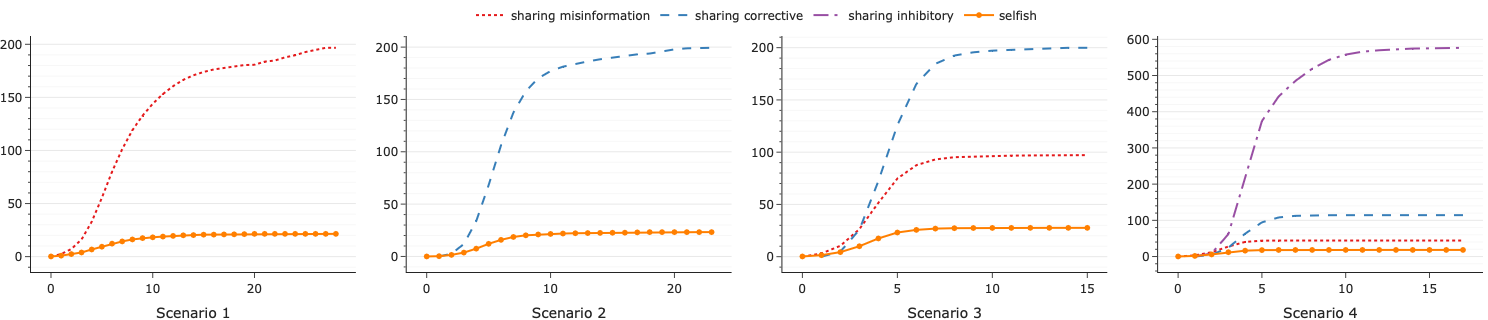

In [ ]:
fig = draw_all("result/", "ba500-5-ok", "total_", height=320)
fig.write_image("image/ba500-5-ok.pdf")
fig.show()

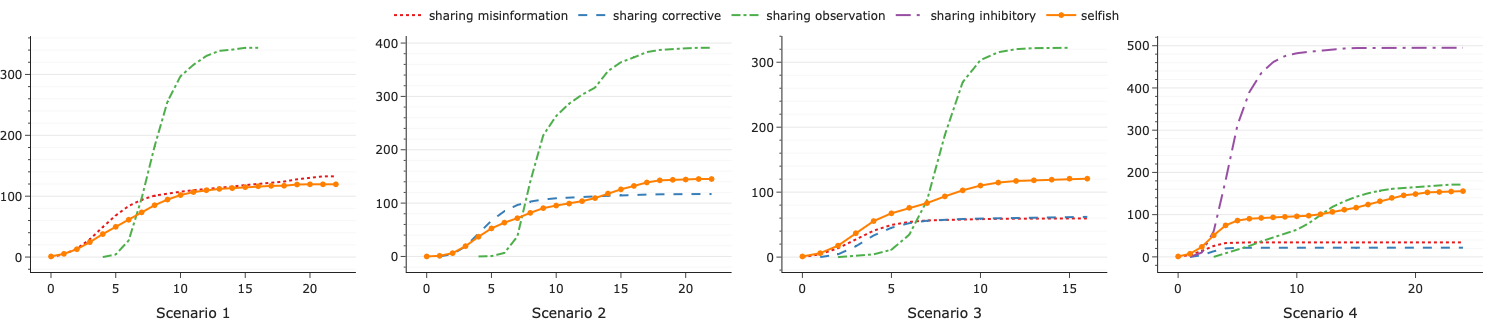

In [ ]:
fig = draw_all("result/", "ba500-5-o-ng", "total_", height=320)
fig.write_image("image/ba500-5-o-ng.pdf")
fig.show()

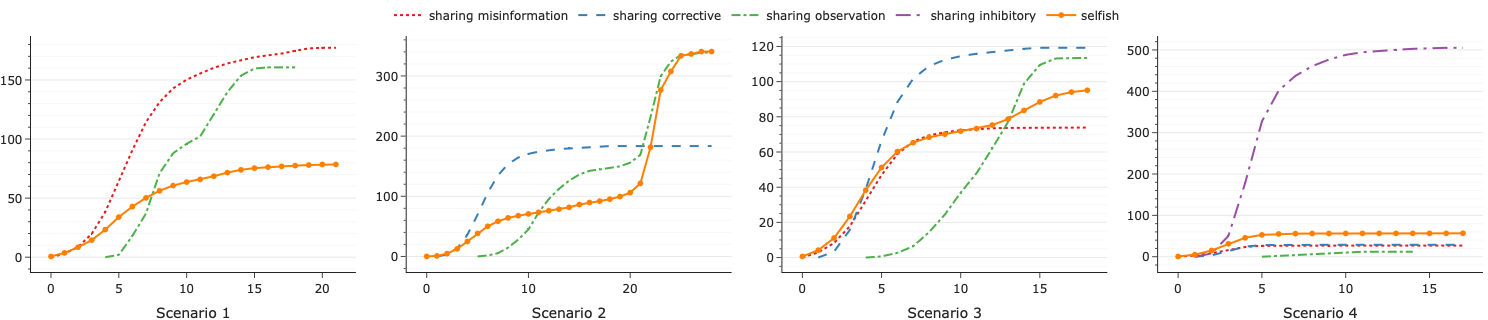

In [ ]:
fig = draw_all("result/", "ba500-5-o-ok", "total_", height=320)
fig.write_image("image/ba500-5-o-ok.pdf")
fig.show()

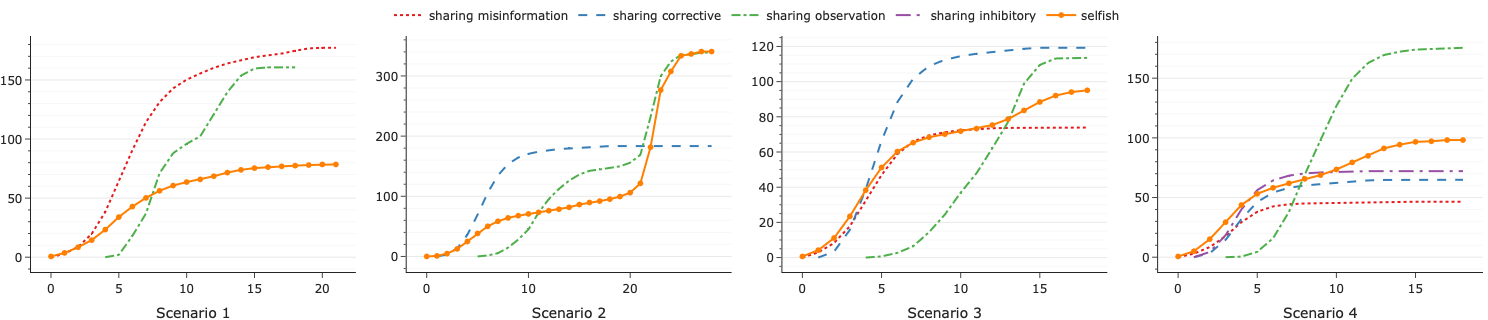

In [ ]:
fig = draw_all("result/", "ba500-5-o-ng-2", "total_", height=320)
fig.write_image("image/ba500-5-o-ng-2.pdf")
fig.show()

### facebook

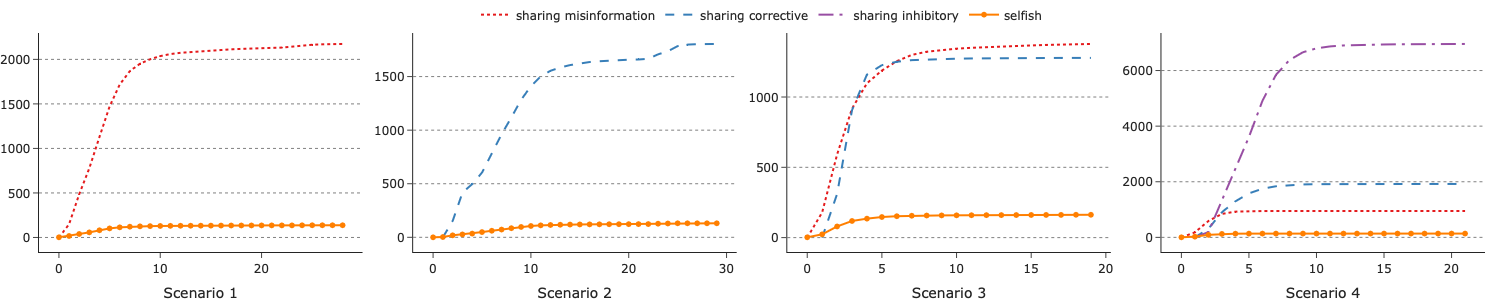

In [ ]:
fig = draw_all("result/", "facebook-ok", "total_")
# fig.write_image("image/ba500-5-ng.png")
fig.show()

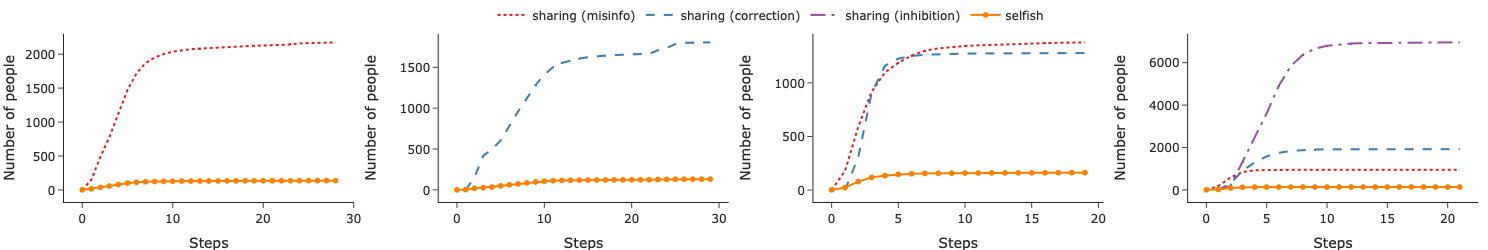

In [ ]:
fig = draw_all("result/", "facebook-ok", "total_")
fig.show()

### ba1000

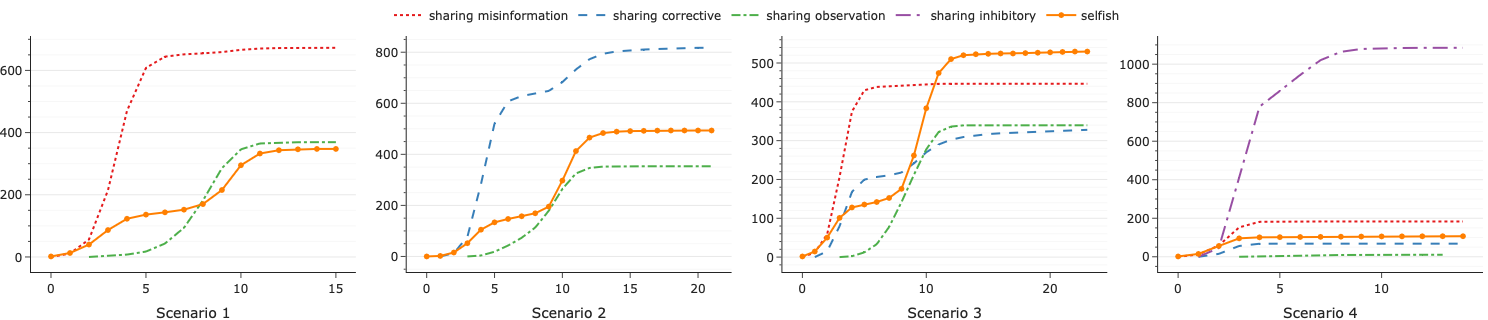

In [ ]:
fig = draw_all("result/", "ba1000-10-o-ok", "total_", height=320)
# fig.write_image("image/ba500-5-o-ok.pdf")
fig.show()

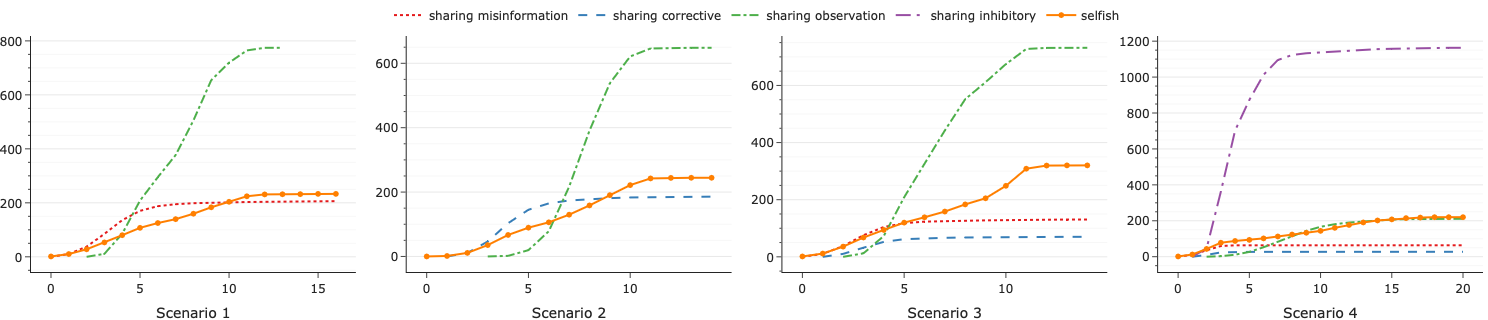

In [ ]:
fig = draw_all("result/", "ba1000-10-o-xx", "total_", height=320)
# fig.write_image("image/ba500-5-o-ng.pdf")
fig.show()

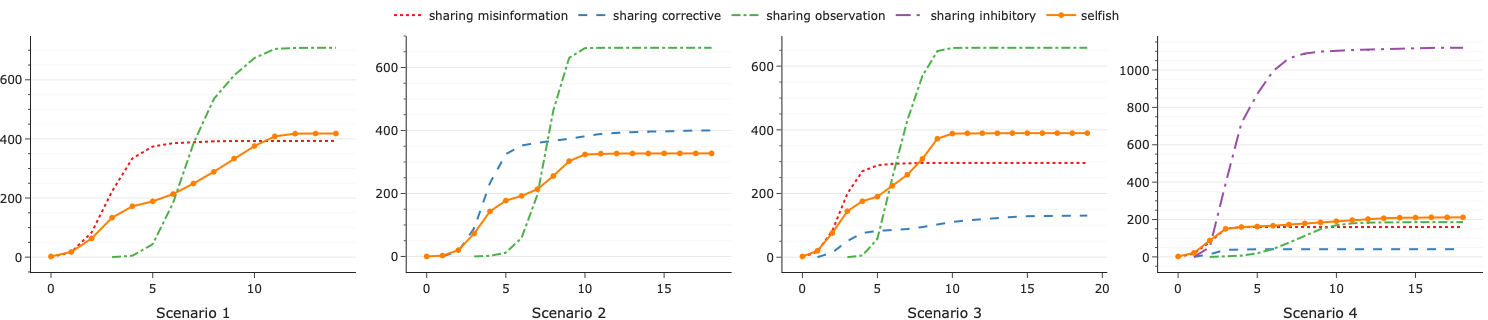

In [ ]:
fig = draw_all("result/", "ba1000-10-o-ng", "total_", height=320)
# fig.write_image("image/ba500-5-o-ng.pdf")
fig.show()

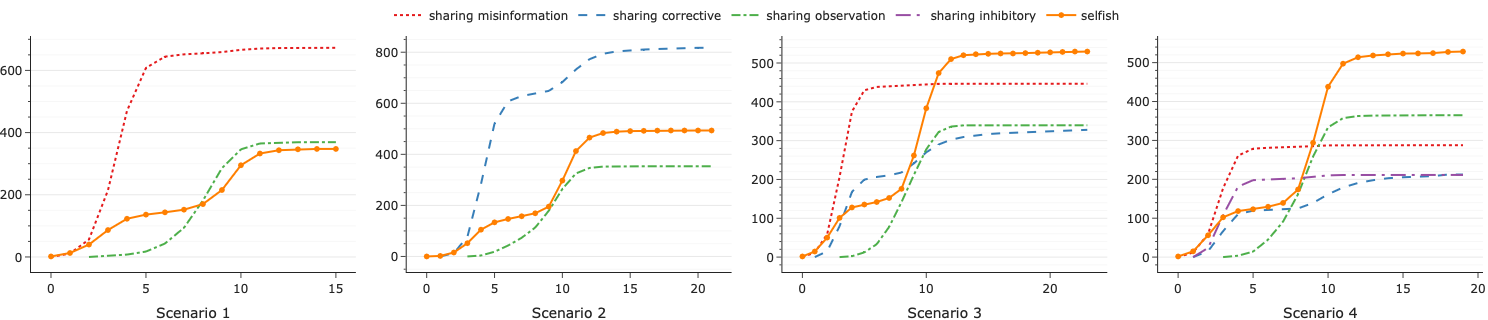

In [ ]:
fig = draw_all("result/", "ba1000-10-o-ng-2", "total_", height=320)
# fig.write_image("image/ba500-5-o-ng-2.pdf")
fig.show()

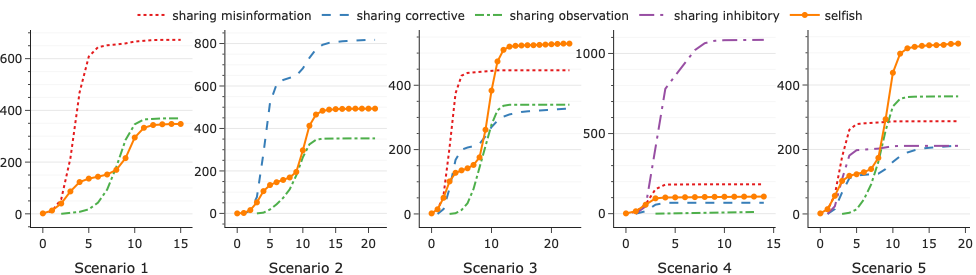

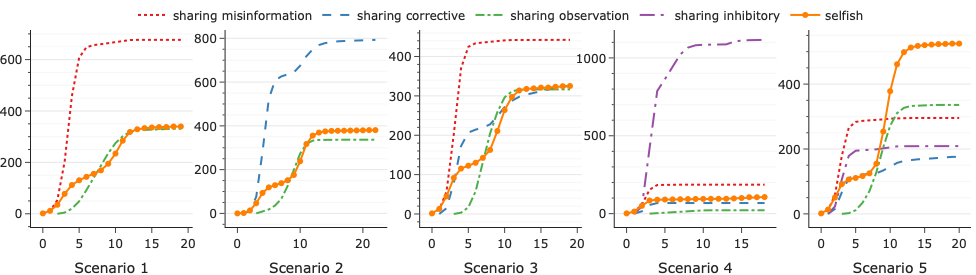

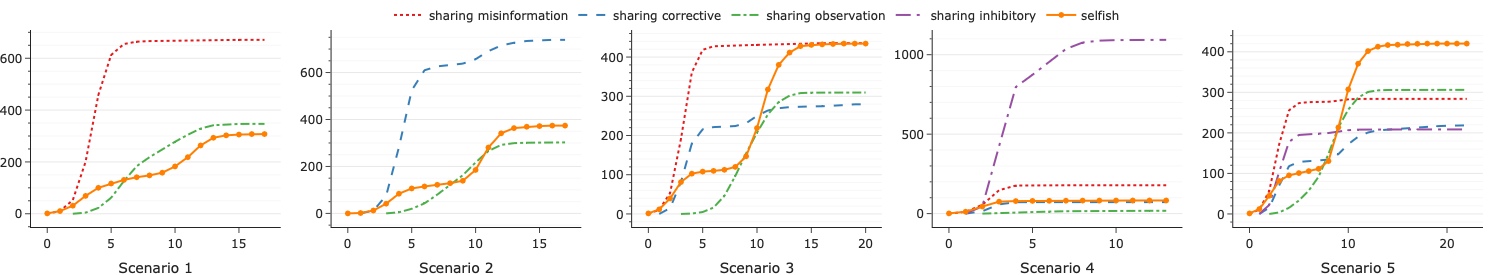

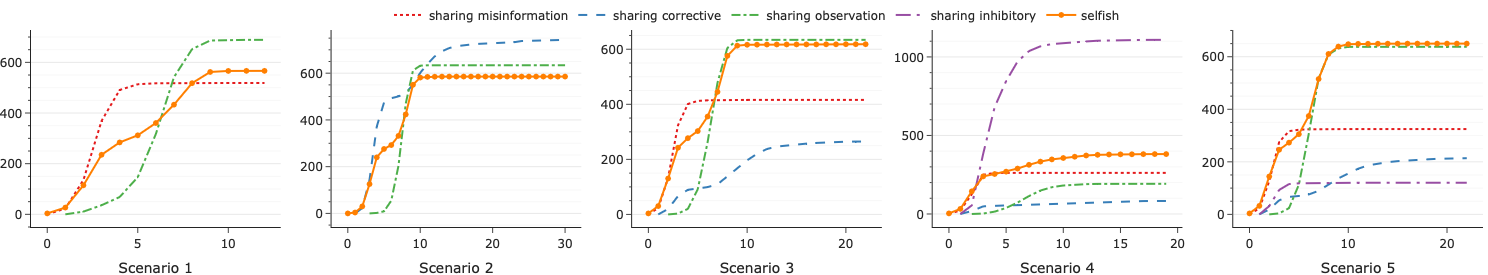

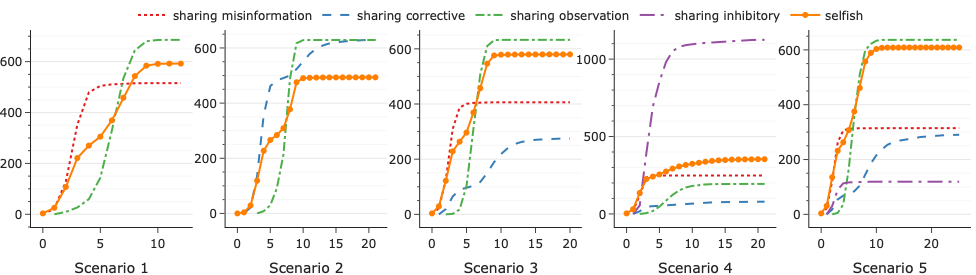

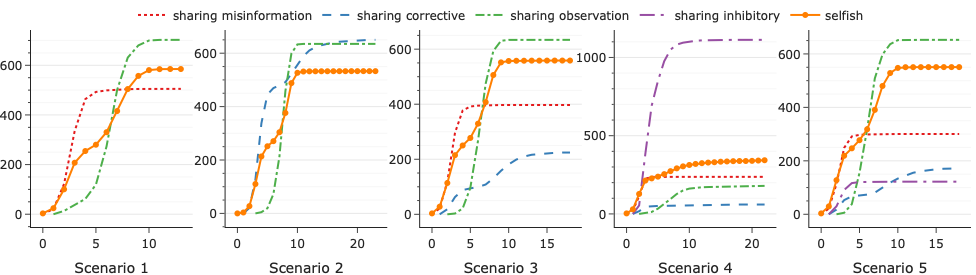

In [ ]:
for s in ["t0-0", "t0-1", "t0-2", "t1-0", "t1-1", "t1-2"]:
    fig = draw_all("result/", f"ba1000-10-{s}", "total_", width=1400, height=275)
    fig.write_image(f"image/ba1000-10-{s}.pdf")
    fig.show()

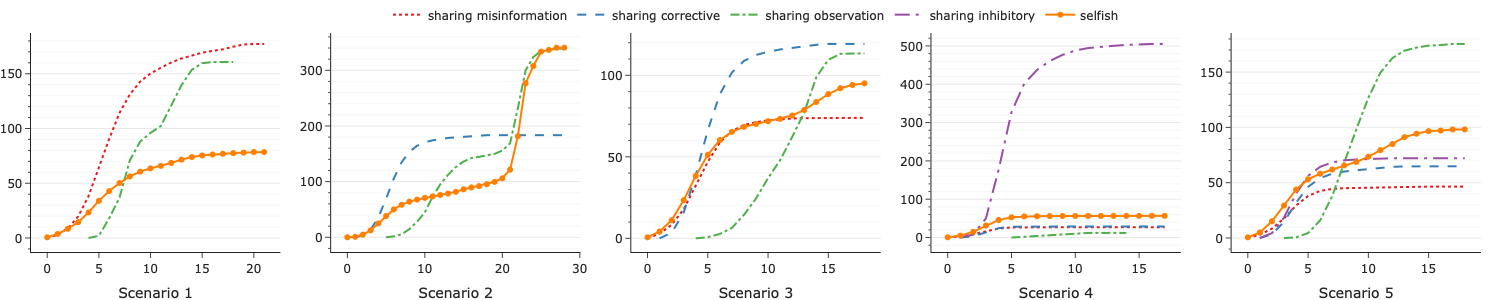

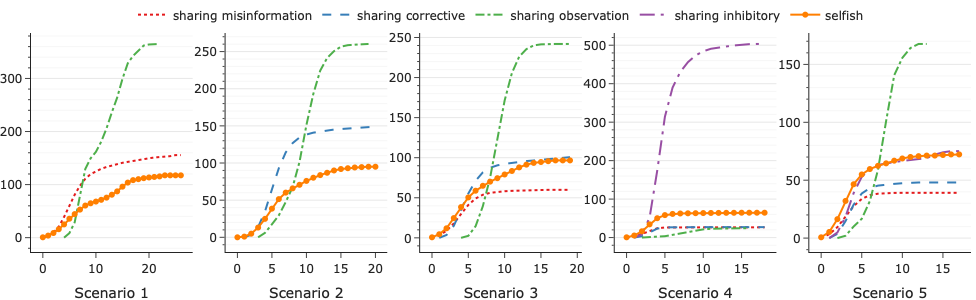

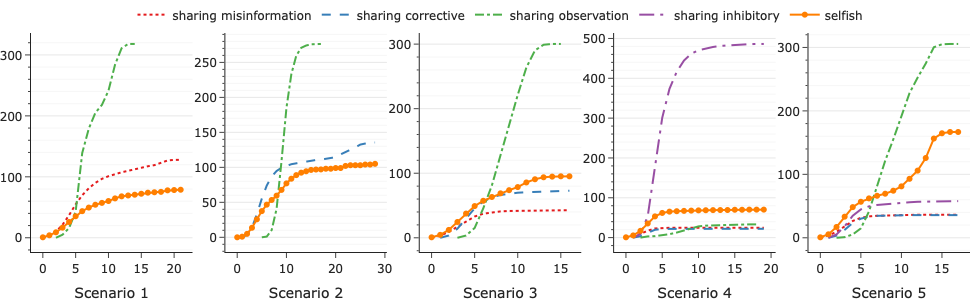

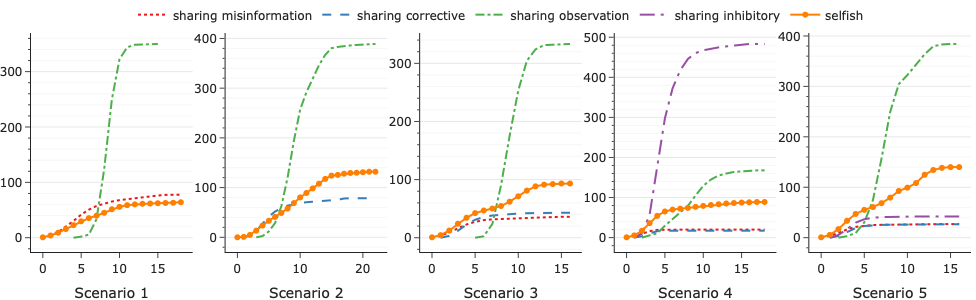

In [ ]:
for s in ["t0-h", "t1-h", "t2-h", "t3-h"]:
    fig = draw_all("result/", f"ba500-5-{s}", "total_", width=1400)
    fig.write_image(f"image/ba500-5-{s}.pdf")
    fig.show()

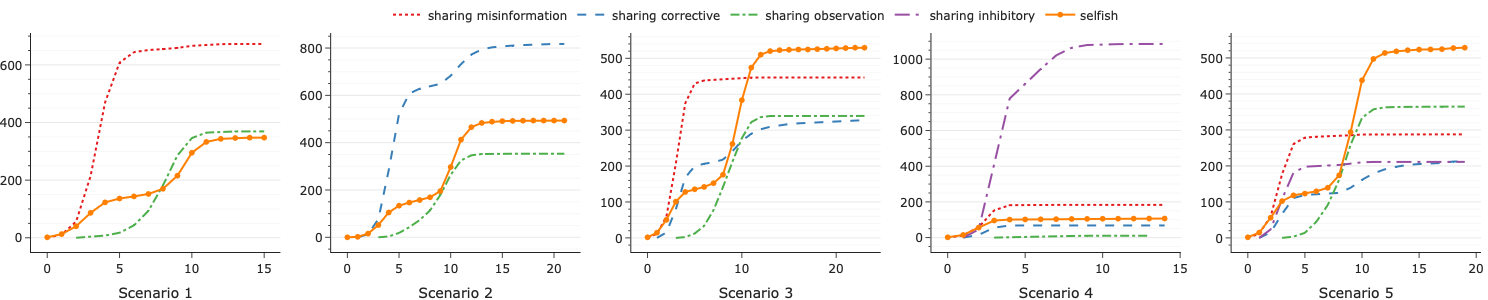

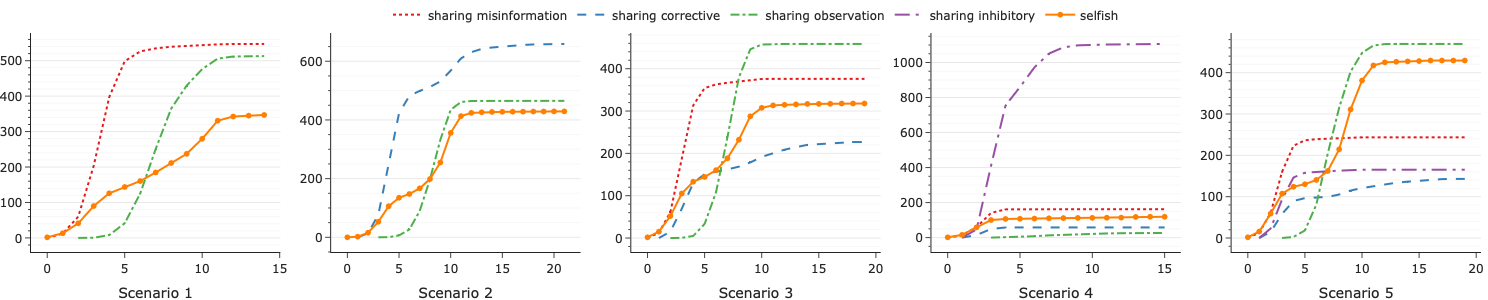

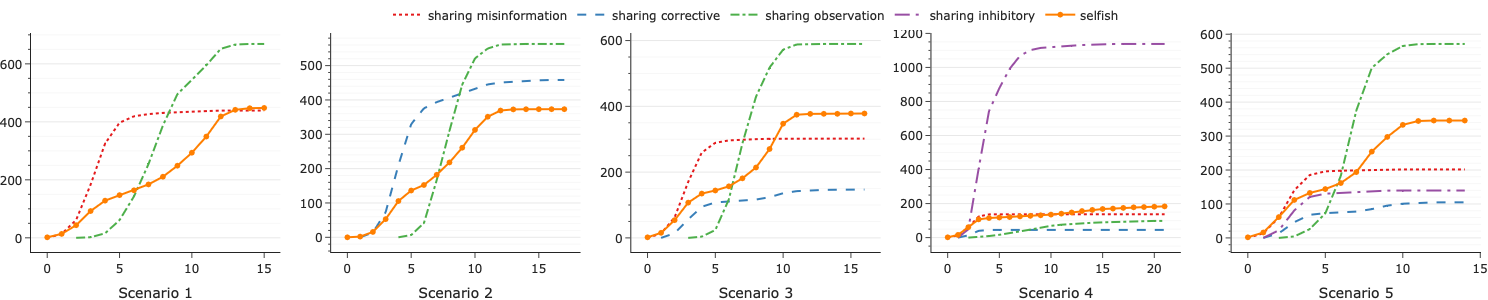

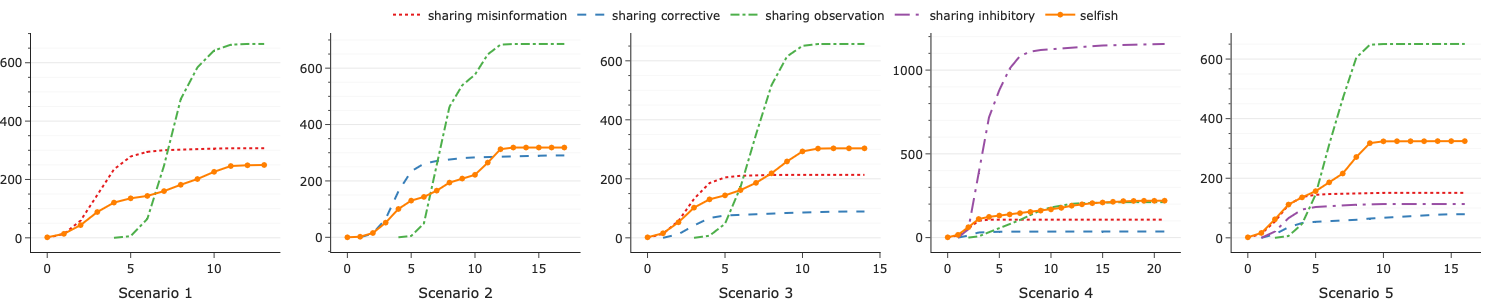

In [ ]:
for s in ["t0-h", "t1-h", "t2-h", "t3-h"]:
    fig = draw_all("result/", f"ba1000-10-{s}", "total_", width=1400)
    fig.write_image(f"image/ba1000-10-{s}.pdf")
    fig.show()

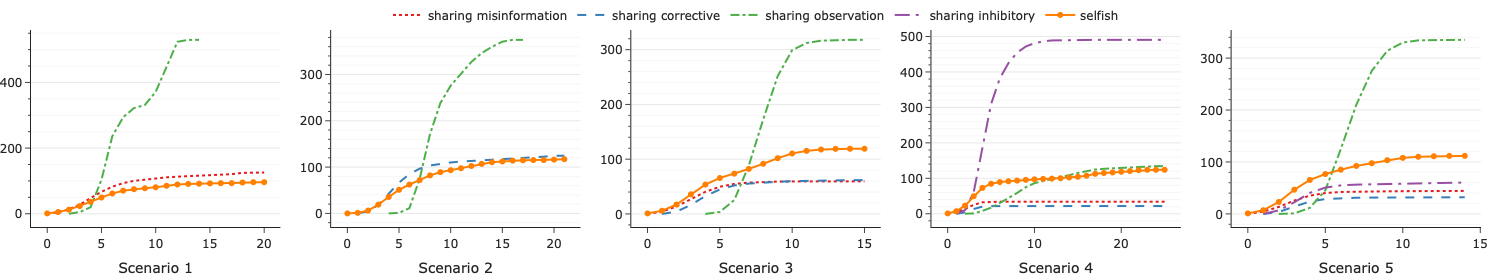

In [ ]:
# "t0-0", "t0-1", "t0-2", "t1-0", "t1-1", "t1-2", 
for s in ["t2-0"]:
    fig = draw_all("result/", f"ba500-5-{s}", "total_", width=1400,height=275)
    # fig.write_image(f"image/ba500-5-{s}.pdf")
    fig.show()

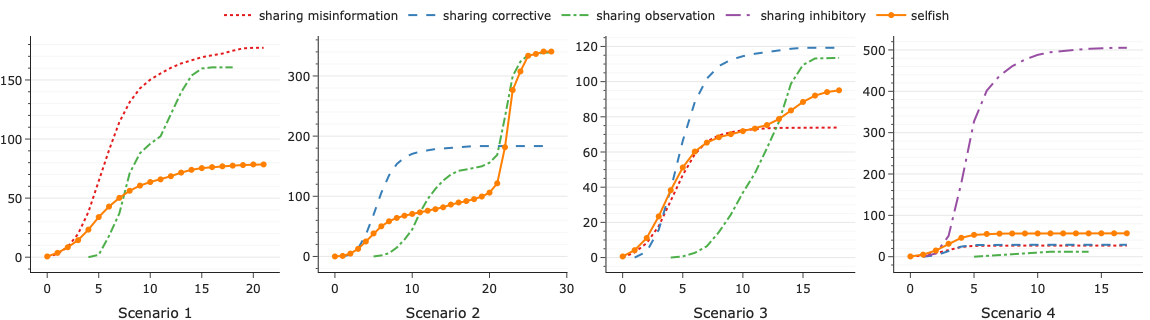

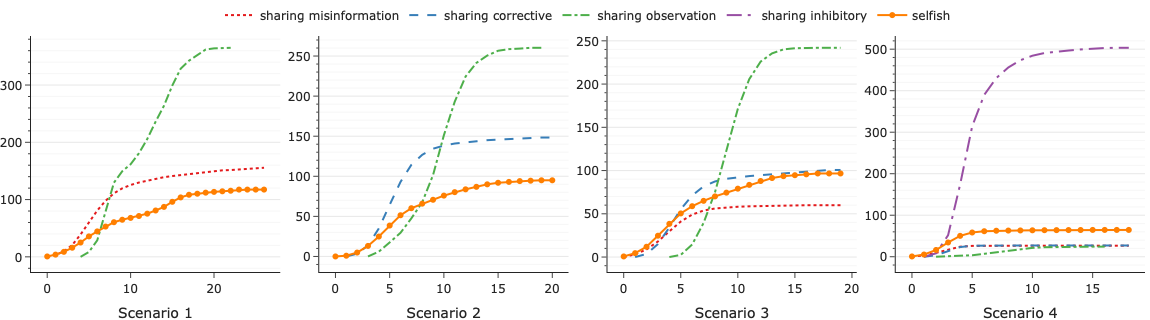

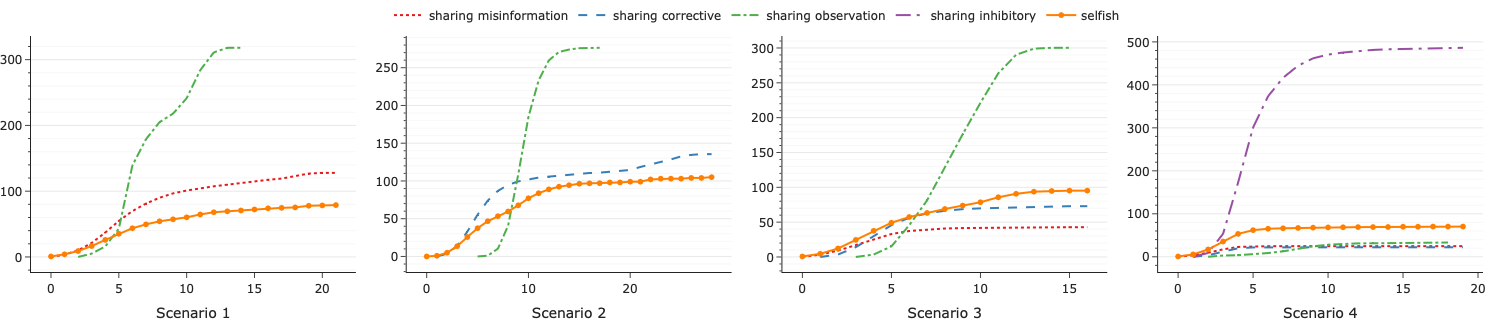

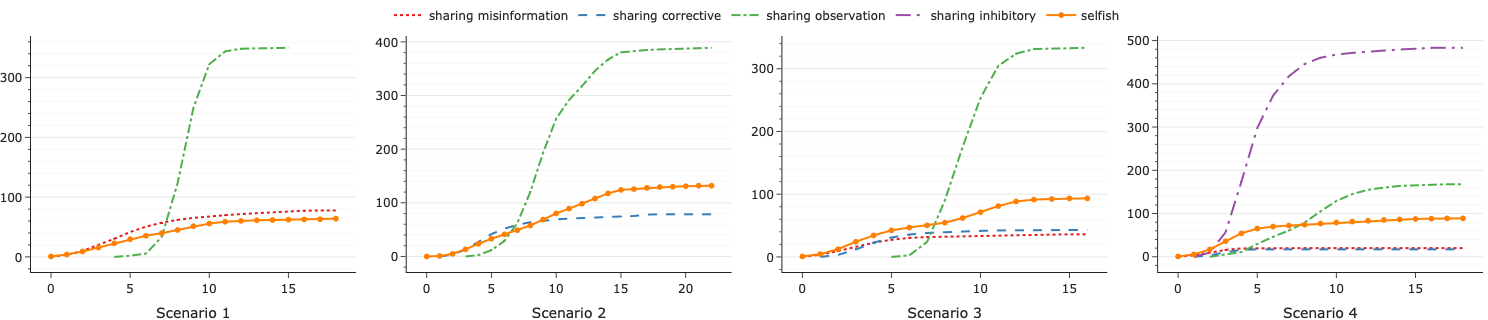

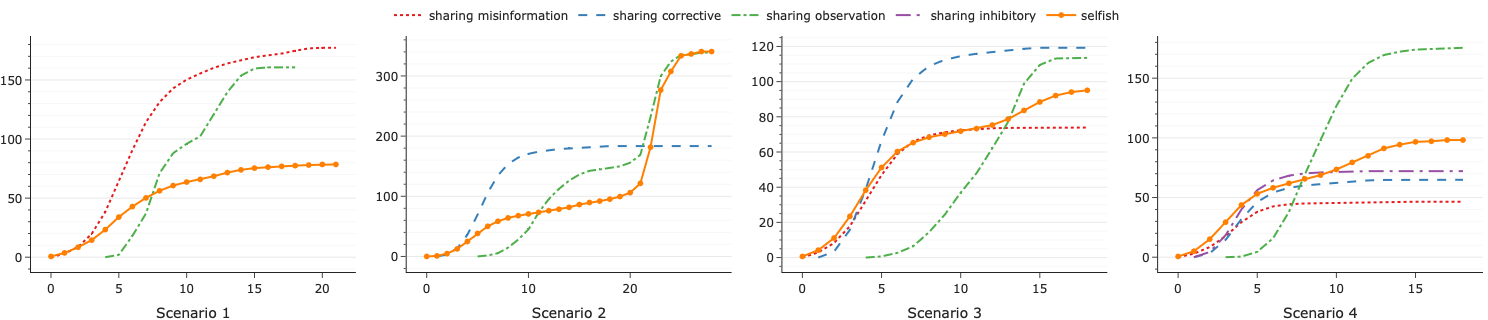

## new

### ba500

In [ ]:
ba5h = PlotObj("result2/", "ba500-5", 500)

In [ ]:
ba5h.make_fig(hm=0.032)

In [ ]:
show_maxes(ba5h)

[0.9529762626262628,
 0.7165477328227329,
 0.7587841269841271,
 0.9767338719082354,
 0.8200714285714286]
0.4841210710596183


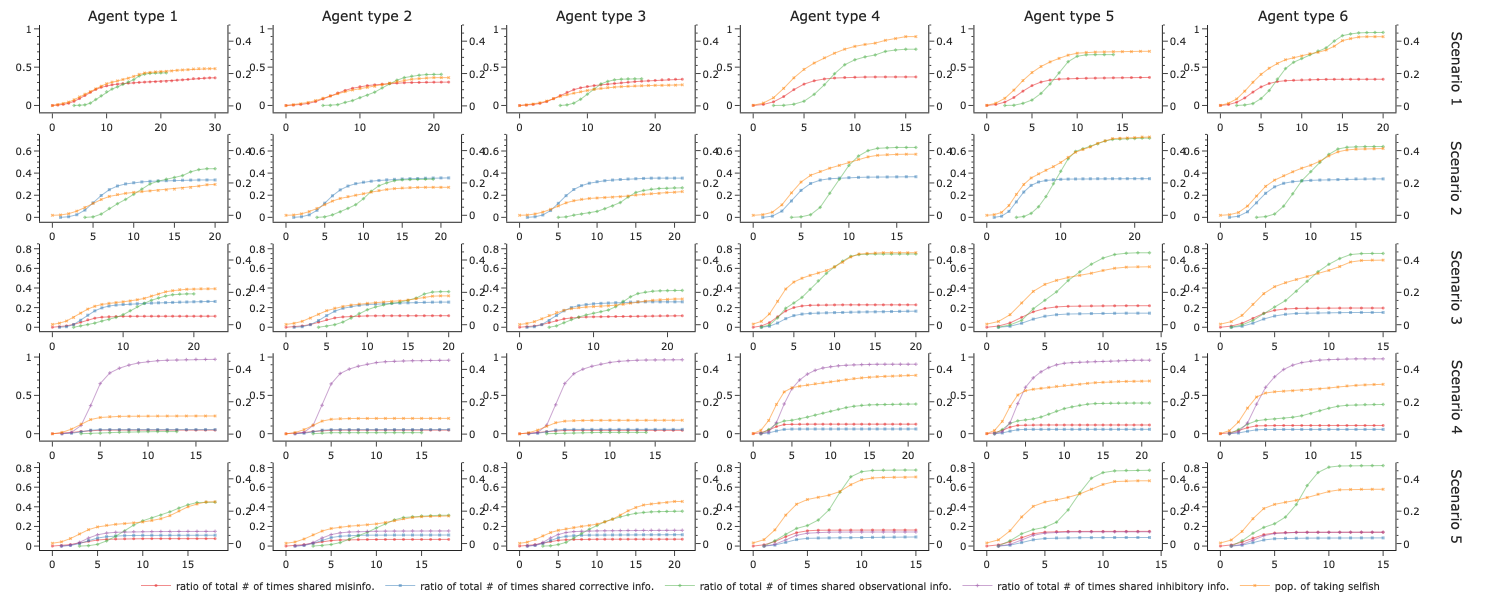

In [ ]:
ba5h.fig.update_layout(
    margin=dict(t=25,b=50,l=40,r=0),
    legend=dict(orientation="h", x=0.5, xanchor="center", y=-0.04),
    width=1600,
    height=600,
    font_size=10,
)
for j in range(6):
    ba5h.fig.update_yaxes(row=1,col=j+1,secondary_y=False,range=[-0.09,1.05],minor=dict(ticklen=2))
    ba5h.fig.update_yaxes(row=2,col=j+1,secondary_y=False,range=[-0.04,0.75],minor=dict(ticklen=2))
    ba5h.fig.update_yaxes(row=3,col=j+1,secondary_y=False,range=[-0.04,0.85],minor=dict(ticklen=2))
    ba5h.fig.update_yaxes(row=4,col=j+1,secondary_y=False,range=[-0.09,1.05],minor=dict(ticklen=2))
    ba5h.fig.update_yaxes(row=5,col=j+1,secondary_y=False,range=[-0.04,0.85],minor=dict(ticklen=2))
    
for i in range(5):
    for j in range(6):
        ba5h.fig.update_yaxes(row=i+1,col=j+1,secondary_y=True, range=[-0.04,0.50],minor=dict(ticklen=2))
ba5h.fig.write_image(f"image/ba500_2.pdf")
ba5h.fig.show()

### ba1000

In [ ]:
ba1t = PlotObj("result2/", "ba1000-10", 1000)

In [ ]:
ba1t.make_fig(hm=0.032)

In [ ]:
show_maxes(ba1t)

[0.6824364361001317,
 0.8490132093957936,
 0.6589743476337904,
 1.1731715841103345,
 0.6688109890109889]
0.6091471818921822


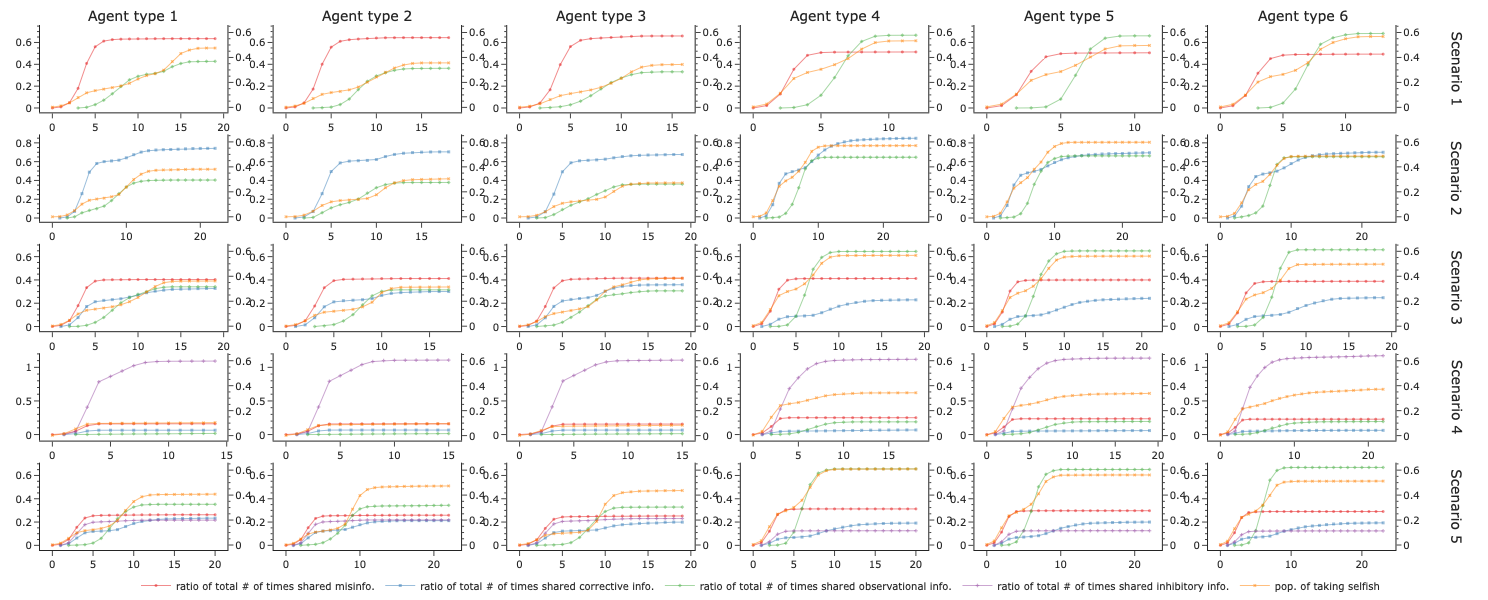

In [ ]:
ba1t.fig.update_layout(
    margin=dict(t=25,b=50,l=40,r=0),
    legend=dict(orientation="h", x=0.5, xanchor="center", y=-0.04),
    width=1600,
    height=600,
    font_size=10,
)
for j in range(6):
    ba1t.fig.update_yaxes(row=1,col=j+1,secondary_y=False,range=[-0.04,0.76],minor=dict(ticklen=2))
    ba1t.fig.update_yaxes(row=2,col=j+1,secondary_y=False,range=[-0.04,0.89],minor=dict(ticklen=2))
    ba1t.fig.update_yaxes(row=3,col=j+1,secondary_y=False,range=[-0.04,0.71],minor=dict(ticklen=2))
    ba1t.fig.update_yaxes(row=4,col=j+1,secondary_y=False,range=[-0.09,1.21],minor=dict(ticklen=2))
    ba1t.fig.update_yaxes(row=5,col=j+1,secondary_y=False,range=[-0.04,0.71],minor=dict(ticklen=2))
    
for i in range(5):
    for j in range(6):
        ba1t.fig.update_yaxes(row=i+1,col=j+1,secondary_y=True, range=[-0.04,0.66],minor=dict(ticklen=2))
ba1t.fig.write_image(f"image/ba1000_2.pdf")
ba1t.fig.show()

### ego-facebook

In [ ]:
fb = PlotObj("result2/", "facebook", 4039)

In [ ]:
fb.make_fig(hm=0.032)

In [ ]:
show_maxes(fb)

[0.6349249562031674,
 0.7384615720876443,
 0.6539130001960067,
 1.3326566872737842,
 0.6503000503062893]
0.7954462127847994


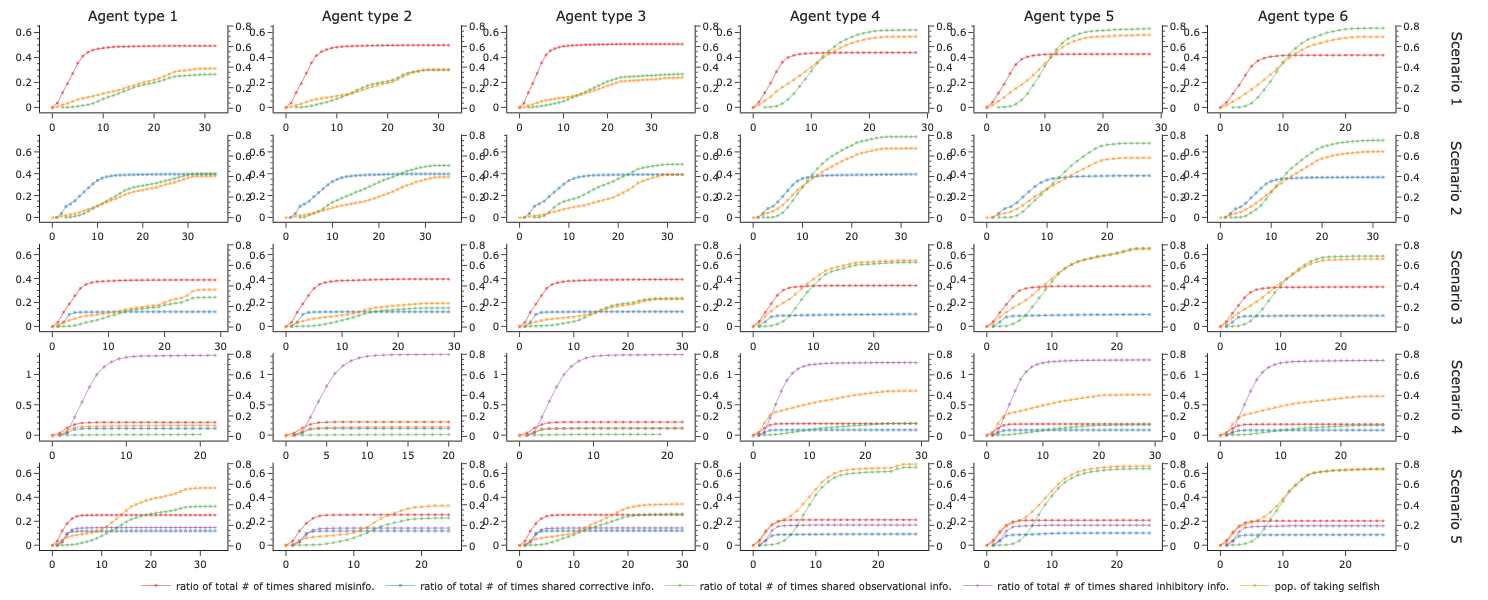

In [ ]:
fig = fb.fig
fig.update_layout(
    margin=dict(t=25,b=50,l=40,r=0),
    legend=dict(orientation="h", x=0.5, xanchor="center", y=-0.04),
    width=1600,
    height=600,
    font_size=10,
)
for j in range(6):
    fig.update_yaxes(row=1,col=j+1,secondary_y=False,range=[-0.04,0.66],minor=dict(ticklen=2))
    fig.update_yaxes(row=2,col=j+1,secondary_y=False,range=[-0.04,0.76],minor=dict(ticklen=2))
    fig.update_yaxes(row=3,col=j+1,secondary_y=False,range=[-0.04,0.69],minor=dict(ticklen=2))
    fig.update_yaxes(row=4,col=j+1,secondary_y=False,range=[-0.09,1.35],minor=dict(ticklen=2))
    fig.update_yaxes(row=5,col=j+1,secondary_y=False,range=[-0.04,0.69],minor=dict(ticklen=2))
    
for i in range(5):
    for j in range(6):
        fig.update_yaxes(row=i+1,col=j+1,secondary_y=True, range=[-0.04,0.81],minor=dict(ticklen=2))
fig.write_image(f"image/facebook.pdf")
fig.show()

### wiki-vote

In [ ]:
wv = PlotObj("result2/", "wikivote", 7115)

In [ ]:
wv.make_fig(hm=0.032)

In [ ]:
show_maxes(wv)

[0.3546302828177047,
 0.26172561905993297,
 0.24622715589186325,
 2.6529450343847656,
 0.2735690492721342]
0.4266574203878936


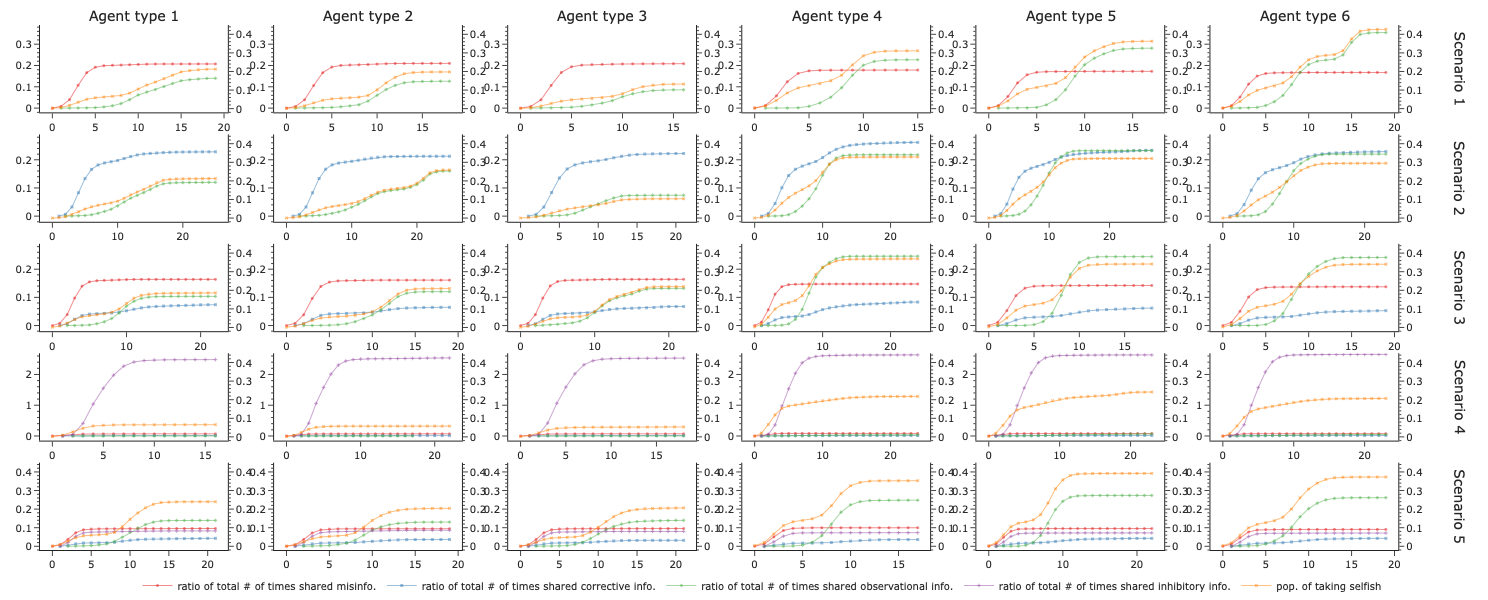

In [ ]:
fig = wv.fig
fig.update_layout(
    margin=dict(t=25,b=50,l=40,r=0),
    legend=dict(orientation="h", x=0.5, xanchor="center", y=-0.04),
    width=1600,
    height=600,
    font_size=10,
)
for j in range(6):
    fig.update_yaxes(row=1,col=j+1,secondary_y=False,range=[-0.02,0.39],minor=dict(ticklen=2))
    fig.update_yaxes(row=2,col=j+1,secondary_y=False,range=[-0.02,0.29],minor=dict(ticklen=2))
    fig.update_yaxes(row=3,col=j+1,secondary_y=False,range=[-0.02,0.29],minor=dict(ticklen=2))
    fig.update_yaxes(row=4,col=j+1,secondary_y=False,range=[-0.15,2.69],minor=dict(ticklen=2))
    fig.update_yaxes(row=5,col=j+1,secondary_y=False,range=[-0.02,0.45],minor=dict(ticklen=2))
    
for i in range(5):
    for j in range(6):
        fig.update_yaxes(row=i+1,col=j+1,secondary_y=True, range=[-0.02,0.45],minor=dict(ticklen=2))
fig.write_image(f"image/wikivote.pdf")
fig.show()

## v3

In [6]:
from typing import Callable

class PlotObj2:
    grid: MyGrid
    grid_t: MyGrid
    fig: go.Figure | None
    vm: float 
    hm: float
    tx: float 
    ty: float
    at: Callable[[int],str]
    st: Callable[[int],str]

    def __init__(self, root: str, name: str, n: int, sufixes: list[str]):
        grid = make_grid(
            root,
            [f"{name}-{s}" for s in sufixes],
            "total_", n)
        update_grid(grid)
        self.grid = grid
        self.grid_t = transpose_grid(grid)
        self.vm = 0.042
        self.hm = 0.04
        self.tx = 0.97
        self.ty = 1.04
        self.st=lambda i: f"Scenario {i+1}"
        self.at=lambda i: f"Agent type {i+1}"

    def make_fig(self):
        self.fig = make_grid_fig(self.grid, self.at, self.st, vm=self.vm, hm=self.hm, tx=self.tx, ty=self.ty)

    def make_fig_t(self):
        self.fig = make_grid_fig(self.grid_t, self.st, self.at, vm=self.vm, hm=self.hm, tx=self.tx, ty=self.ty)

def show_maxes2(obj: PlotObj2):
    xs = [max(t.trace.x, default=-1) for r in obj.grid_t.mesh for c in r for t in c]
    ys = [max(t.trace.y, default=-1) for r in obj.grid_t.mesh for c in r for t in c]
    pprint.pp(max(xs))
    pprint.pp(max(ys))
    # pprint.pp(max(t.trace.y,default=-1) for r in obj.grid_t.mesh  for c in r for t in c)

def get_fig(obj: PlotObj2) -> go.Figure:
    fig = make_grid_fig(obj.grid, obj.vm, obj.hm, False)
    add_grid_titles(fig, obj.grid.rows, obj.grid.cols, obj.at, obj.st, obj.vm, obj.hm, obj.tx, obj.ty)
    return fig

def get_fig_t(obj: PlotObj2) -> go.Figure:
    fig = make_grid_fig(obj.grid_t, obj.vm, obj.hm, False)
    add_grid_titles(fig, obj.grid_t.rows, obj.grid_t.cols, obj.st, obj.at, obj.vm, obj.hm, obj.tx, obj.ty)
    return fig


In [7]:
def update_traces(ts: list[MyTrace]):
    # change line style
    colors = iter(px.colors.qualitative.Safe)
    for t in ts:
        c = colors.__next__().replace('rgb','rgba').replace(')',',0.75)')
        t.trace.update(mode="lines")
        t.trace.line.update(color=c,width=1.25)
        # t.trace.line.update(color=c, mode="lines")

def disable_secondary(grid: MyGrid):
    for r in grid.mesh:
        for c in r:
            c[4].secondary = False


### ba1000

In [12]:
ba1t = PlotObj2("result3/", "ba1000-10", 1000, ["p0", "p1", "p2", "p3", "p4", "p5"])

In [410]:
show_maxes2(ba1t)

25
2.5089992338127822


In [677]:
set_name(ba1t.grid, name_conv2)
disable_secondary(ba1t.grid)
map_my_traces(ba1t.grid, update_traces)

In [758]:
ba1t.hm = 0.025
ba1t.tx = 1.022
fig = get_fig_t(ba1t)
fig.update_layout(
    margin=dict(t=25,b=0,l=30,r=35),
    legend=dict(orientation="h", x=0.5, xanchor="center", y=-0.04),
    width=1400, height=650, font_size=10,
)
fig.update_yaxes(range=[-0.09,2.59],minor=dict(ticklen=2,showgrid=True),showgrid=True)
fig.update_xaxes(range=[-1.2,25.5],minor=dict(ticklen=2))
fig.write_image(f"image2/ba1000.pdf")
fig.show()

### facebook

In [13]:
fb = PlotObj2("result3/", "facebook", 4039, ["p0", "p1", "p2", "p3", "p4", "p5"])

In [415]:
show_maxes2(fb)

36
1.1926175899606035


In [680]:
set_name(fb.grid, name_conv2)
disable_secondary(fb.grid)
map_my_traces(fb.grid, update_traces)

In [681]:
fb.hm = 0.025
fb.tx = 1.022
fig = get_fig_t(fb)
fig.update_layout(
    margin=dict(t=25,b=0,l=30,r=35),
    legend=dict(orientation="h", x=0.5, xanchor="center", y=-0.04),
    width=1400, height=650, font_size=10,
)
fig.update_yaxes(range=[-0.05,1.29],minor=dict(ticklen=2,showgrid=True),showgrid=True)
fig.update_xaxes(range=[-1.2,37.2],minor=dict(ticklen=2))
fig.write_image(f"image2/facebook.pdf")
fig.show()

### wikivote 

In [14]:
wv = PlotObj2("result3/", "wikivote", 7115, ["p0", "p1", "p2", "p3", "p4", "p5"])

In [684]:
show_maxes2(wv)

30
1.1305208090288068


In [682]:
set_name(wv.grid, name_conv2)
disable_secondary(wv.grid)
map_my_traces(wv.grid, update_traces)

In [685]:
wv.hm = 0.025
wv.tx = 1.022
fig = get_fig_t(wv)
fig.update_layout(
    margin=dict(t=25,b=0,l=30,r=35),
    legend=dict(orientation="h", x=0.5, xanchor="center", y=-0.04),
    width=1400, height=650, font_size=10,
)
fig.update_yaxes(range=[-0.05,1.19],minor=dict(ticklen=2,showgrid=True),showgrid=True)
fig.update_xaxes(range=[-1.2,31.2],minor=dict(ticklen=2))
fig.write_image(f"image2/wikivote.pdf")
fig.show()

### summary

In [15]:
def get_summary(obj: PlotObj2):
    data = dict(at=[obj.at(j) for j in range(obj.grid.rows)])
    for i in range(0, 5):
        v = []
        data[obj.st(i)] = v
        for r in obj.grid.mesh:
            assert r[i][4].name == "selfish"
            v.append(max(r[i][4].trace.y))
    return (
        pl.DataFrame(data).lazy()
        .with_columns(((pl.col("Scenario 3") - pl.col("Scenario 1")) / pl.col("Scenario 1") * 100).round(2).alias("1vs3"))
        .with_columns(((pl.col("Scenario 4") - pl.col("Scenario 3")) / pl.col("Scenario 3") * 100).round(2).alias("3vs4"))
        .with_columns(((pl.col("Scenario 5") - pl.col("Scenario 3")) / pl.col("Scenario 3") * 100).round(2).alias("3vs5"))
        .collect()
    )

In [16]:
sm_ba = get_summary(ba1t)
sm_fb = get_summary(fb)
sm_wv = get_summary(wv)

In [ ]:
def plot_summary(data: pl.DataFrame, fig: go.Figure, col: int, legend: bool):
    colors = iter(px.colors.qualitative.Safe)
    (fig
     .add_trace(go.Bar(y=data["at"], x=data["1vs3"], name="Scenario 1 vs 3", orientation="h", marker=dict(color=colors.__next__()),showlegend=legend), row=1, col=col)
     .add_trace(go.Bar(y=data["at"], x=data["3vs4"], name="Scenario 3 vs 4", orientation="h", marker=dict(color=colors.__next__()),showlegend=legend), row=1, col=col)
     .add_trace(go.Bar(y=data["at"], x=data["3vs5"], name="Scenario 3 vs 5", orientation="h", marker=dict(color=colors.__next__()),showlegend=legend), row=1, col=col)
    )

In [128]:
import math
hs = 0.08
cols = 3
width=int(math.ceil(72*3*7.16))
height=int(math.ceil(72*3.5))
fig = make_subplots(rows=1, cols=cols, horizontal_spacing=hs)
plot_summary(sm_ba, fig, 1, False)
plot_summary(sm_fb, fig, 2, False)
plot_summary(sm_wv, fig, 3, True)
(
    fig.update_layout(legend=dict(orientation="h", x=0.5-0.035, xanchor="center", yanchor="top", y=1.17))
    .update_xaxes(
        minor=dict(ticklen=2,showgrid=True),showgrid=True,
        #  title="Relative change of population of selfish action (%)"
    )
    .update_yaxes(autorange="reversed")
    .update_layout(
        margin=dict(t=0,r=0,b=55,l=0),
        font=dict(size=14),
        width=width, height=height,
        template="simple_white"
    )
)
w = (1-hs*(cols-1))/cols
for i,t in enumerate(["BA model","Facebook network","Wiki-vote network"]):
    fig.add_annotation(
        text=f"({chr(i+ord('a'))}) {t}",showarrow=False,xref="paper",yref="paper",xanchor="center",yanchor="top",font=dict(size=18,family="times"),
        x=w/2+(w+hs)*i-0.03,y=-0.17)

fig.write_image("image2/smr.pdf", width=width, scale=1)#height=height, scale=1)
# fig.show()

In [ ]:
# nl = False
nl = True
suf = "_nl" if nl else ""
fig = plot_summary(sm_ba, nl)
fig.show()
fig.write_image(f"image2/smr_ba{suf}.pdf")
fig = plot_summary(sm_fb, nl)
fig.show()
fig.write_image(f"image2/smr_fb{suf}.pdf")
fig = plot_summary(sm_wv, nl)
fig.show()
fig.write_image(f"image2/smr_wv{suf}.pdf")

### メモ

type 3以外のscenario2でstep 1から訂正情報の二次的な拡散が起きる理由として考えられることは，
訂正情報に含まれるplausible eventの否定意見に僅かのuncertaintyが含まれており，eventを完全に否定してはいない．
訂正情報へのtrustが低いエージェントが確率的に存在するため，
そのエージェントが訂正情報を得ると若干の